In [2]:
import pandas as pd
import numpy as np
import os
import pickle

In [5]:
data_file = '/Users/lidiayung/project/resource/perturbations/DATA_LINCS/ALL_DATA_2020_Jing.xlsx'
STVs = pd.read_excel(data_file, sheet_name = "STVs", index_col = 0)
display(STVs)
states = STVs.columns.to_list()
print("States:", states)

,blca_inv,blca_onc,surv_coef
Gene,,,
AARS,0.033517,0.022350,0.000000
ABCB6,-0.003545,0.010205,-3.044375
ABCC5,-0.015218,0.003614,0.000000
ABCF1,-0.033132,-0.019531,-0.639482
ABCF3,0.027963,-0.021409,0.000000
...,...,...,...
SYPL1,0.000000,0.000000,0.000000
TCEAL4,0.000000,0.000000,0.000000
TENT4A,0.000000,0.000000,0.000000


States: ['blca_inv', 'blca_onc', 'surv_coef']


In [17]:
cell_lines=pd.read_excel('/Users/lidiayung/project/ucd_cstar/viena/1-s2.0-S0302283822016785-mmc2.xlsx',
                         sheet_name='Suppl. table 2')

In [18]:
cell_lines.drop(columns='Description',inplace=True)

In [19]:
cell_lines.set_index('GENE',inplace=True)

In [20]:
display(cell_lines)

,HT1376,SCaBER,T24,SV-HUC,94-10,97-1,J82,RT4,TCCSUP,253J,...,VMCUB2,BC3C,BFTC905,KU1919,SD,VMCUB1,97-24,DSH1,JMSU1,RT112
GENE,,,,,,,,,,,,,,,,,,,,,
ACTB,10764.00,12199.90,8714.98,20783.80,8733.32,8628.10,10446.40,7672.91,14989.90,8817.05,...,18859.60,9118.85,9572.72,20973.00,12116.80,24617.90,16192.00,8519.72,13352.50,9290.68
B2M,13398.80,8728.56,11661.80,9262.90,2132.29,2276.01,17958.10,7329.10,10117.10,3179.73,...,3077.87,4198.92,2265.14,5701.33,3621.52,3061.28,2403.99,4859.61,4449.83,4155.86
HLA-A,6532.75,2871.19,2249.83,6736.70,670.96,2144.13,10754.30,1869.38,3690.13,1889.55,...,2982.40,1847.71,1487.66,1552.42,754.29,850.42,582.38,1240.13,888.44,326.48
GNB2L1,2438.67,3771.29,4370.83,6061.66,6144.25,6236.19,2404.66,6418.61,3051.48,5764.55,...,4958.43,6071.53,8481.75,7725.72,5609.70,5613.63,5029.02,1615.17,5467.65,5313.09
TMSB10,2391.47,8766.98,6427.58,5748.85,4793.07,7520.14,4909.37,1487.69,5277.62,10837.10,...,5225.44,3989.49,6506.52,23661.80,10831.20,14329.90,12866.40,2134.04,11156.70,4257.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZSCAN10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZSWIM2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [25]:
cell_lines_log=cell_lines.applymap(np.log1p)

/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_2709/415235936.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cell_lines_log=cell_lines.applymap(np.log1p)


In [29]:
cell_lines_log_t= cell_lines_log.T

In [30]:
cell_lines_log_t

GENE,ACTB,B2M,HLA-A,GNB2L1,TMSB10,FN1,S100A11,ANXA2P2,PFN1,RPL8,...,ZNRF4,ZP2,ZP4,ZPBP,ZPBP2,ZSCAN1,ZSCAN10,ZSWIM2,psiTPTE22,tAKR
HT1376,9.284055,9.502995,8.784736,7.799618,7.780082,4.962495,8.714748,7.468565,7.919709,8.345850,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
SCaBER,9.409265,9.074470,7.962830,8.235438,9.078862,5.590651,8.433849,8.242301,7.820492,8.814977,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
T24,9.072913,9.364160,7.719054,8.382937,8.768509,8.771901,7.628785,8.681554,8.577631,8.336009,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
SV-HUC,9.941977,9.133880,8.815474,8.709904,8.656929,8.624094,8.604829,8.566442,8.558644,8.445289,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
94-10,9.075015,7.665421,6.510199,8.723435,8.475135,3.421980,8.590120,8.126190,7.985420,9.601700,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
97-1,9.062895,7.730618,7.670955,8.738285,8.925473,9.039591,8.727010,7.965431,8.182665,8.945210,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
J82,9.254108,9.795852,9.283154,7.785580,8.499105,5.564022,7.937932,8.143122,8.640218,8.138045,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
RT4,8.945582,8.899744,7.533897,8.767113,7.305652,3.280535,8.431027,8.142287,8.341277,8.953467,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
TCCSUP,9.615199,9.222081,8.213688,8.023710,8.571420,7.023064,8.127183,7.741612,8.324955,7.913766,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.173953,0.000000
253J,9.084556,8.064866,7.544623,8.659656,9.290823,7.312467,7.960428,7.462755,8.079726,8.227579,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000


In [32]:
intersection = list(set(list(STVs.index)).intersection(cell_lines_log_t.columns))

In [34]:
len(intersection)

943

In [37]:
cell_lines_log_t_lm=cell_lines_log_t[intersection]
display(cell_lines_log_t_lm)

GENE,NPRL2,DENND2D,SCCPDH,GABPB1,KTN1,TSC22D3,PDLIM1,GMNN,RFC2,FBXO7,...,HERC6,CEBPD,NIPSNAP1,CTNNAL1,DUSP11,ASAH1,IFRD2,IDE,FZD7,CDCA4
HT1376,4.094844,4.813078,6.156661,4.492225,4.937850,2.675527,6.138547,4.835567,5.092400,5.743708,...,5.109877,6.449048,5.904462,6.016377,4.595524,5.083762,5.474914,2.845491,1.989243,4.593199
SCaBER,3.182627,3.738146,3.864092,4.388257,6.400971,4.252203,6.820606,5.004081,4.791235,5.524616,...,4.027314,5.928764,4.934186,5.666357,4.533244,4.704563,5.194622,4.332442,3.335414,4.506565
T24,3.558771,2.425687,4.760292,4.574711,6.016182,4.280271,6.293807,4.268158,4.236856,5.738828,...,5.195509,4.714473,5.343912,5.755077,4.455974,4.709440,4.838264,4.138521,3.641001,5.198828
SV-HUC,3.831030,3.481855,4.702932,4.603969,5.081901,2.706048,7.152707,5.775886,5.693934,5.381417,...,4.763370,3.503754,5.483011,5.153869,4.507006,4.574608,5.873441,3.460095,3.265759,5.039870
94-10,4.097672,3.068518,5.020586,4.248781,5.443586,6.329489,6.055683,5.135563,4.838502,5.623187,...,3.559055,7.283407,4.403176,5.149933,4.491105,4.983538,5.870596,4.077876,2.565718,4.707997
97-1,3.193763,3.034472,3.947583,4.548600,6.024948,6.585413,6.479124,4.795625,4.284000,5.767383,...,2.024193,6.109492,4.264369,4.623108,5.374954,4.930581,5.243069,3.834926,3.350956,4.748578
J82,3.683616,2.424803,4.595019,4.257455,5.564214,3.655323,6.502940,5.803417,4.792396,5.466244,...,5.396668,4.414494,4.928050,5.248024,4.102809,5.351479,5.422745,3.475686,3.686126,4.132764
RT4,4.036715,5.159802,5.593037,4.588634,5.972817,3.043570,6.691774,5.445789,4.847803,5.409769,...,2.846652,5.516649,5.148308,4.050393,4.480060,5.950981,5.185205,4.232946,3.348851,4.702206
TCCSUP,3.642050,2.014903,4.988867,4.445119,5.701413,3.914620,6.566110,5.022564,4.804103,5.445746,...,3.921775,4.446760,5.103883,4.369195,3.904595,4.575947,4.986001,4.315620,5.802753,4.521571
253J,3.893452,0.000000,4.347306,3.816613,5.612763,4.878779,3.362457,4.446292,4.999170,4.929281,...,1.981001,5.153812,6.373149,5.347108,4.155126,3.998568,4.956953,4.286204,4.102643,3.970292


In [39]:
states = STVs.columns.to_list()
print("States:", states)
DPD_df = pd.DataFrame(
    np.zeros((len(cell_lines_log_t_lm), len(states))),
    index = list(cell_lines_log_t_lm.index),
    columns = states,
)

States: ['blca_inv', 'blca_onc', 'surv_coef']


In [43]:
STVs=STVs.loc[intersection]

In [44]:
for exp_id in DPD_df.index:
    for state in states:
        DPD_df.loc[exp_id, state] = np.dot(cell_lines_log_t_lm.loc[exp_id], STVs.loc[:, state])

display(DPD_df)

,blca_inv,blca_onc,surv_coef
HT1376,-10.182347,3.508249,0.198712
SCaBER,-10.012886,4.604385,24.601821
T24,-10.705520,3.712789,33.032169
SV-HUC,-11.801276,2.271523,19.218302
94-10,-10.617896,2.642354,30.700494
97-1,-10.459268,2.787084,31.223506
J82,-11.609017,2.285282,9.255656
RT4,-10.935511,2.235975,13.536707
TCCSUP,-12.128848,1.463050,16.830077
253J,-9.886766,1.957587,36.258647


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [74]:
pip install distinctipy

Note: you may need to restart the kernel to use updated packages.


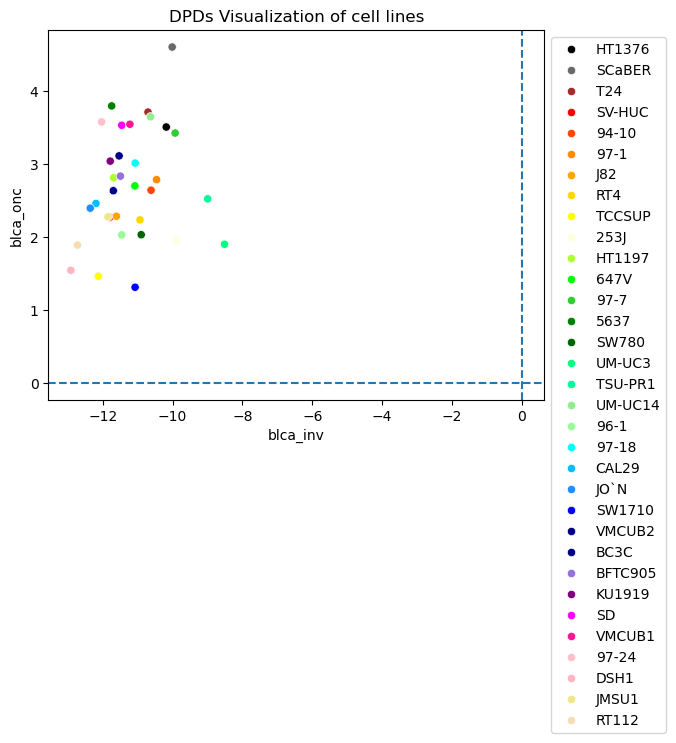

In [77]:
colors = [
    'black', 'dimgray', 'brown', 'red', 'orangered', 'darkorange', 'orange', 'gold', 'yellow',
    'lightyellow', 'greenyellow', 'lime', 'limegreen', 'green', 'darkgreen', 'springgreen', 
    'mediumspringgreen', 'lightgreen', 'palegreen', 'cyan', 'deepskyblue', 'dodgerblue', 
    'blue', 'navy', 'darkblue', 'mediumpurple', 'purple', 'magenta', 'deeppink', 'pink', 
    'lightpink', 'khaki', 'wheat'
]

# Create a Seaborn palette
custom_palette = sns.color_palette(colors)
sns.scatterplot(DPD_df,x='blca_inv',y='blca_onc',hue=DPD_df.index,palette=custom_palette)
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.title("DPDs Visualization of cell lines")
plt.legend(bbox_to_anchor=(1,0, 0,1))

#plt.xlabel('DPD_N/MIBC')
#plt.savefig("/Users/lidiayung/Downloads/DPD_sct_lincs_healthy_onc.png",dpi=300)


In [57]:
len(DPD_df)

33

In [52]:
cell_line_ids=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']


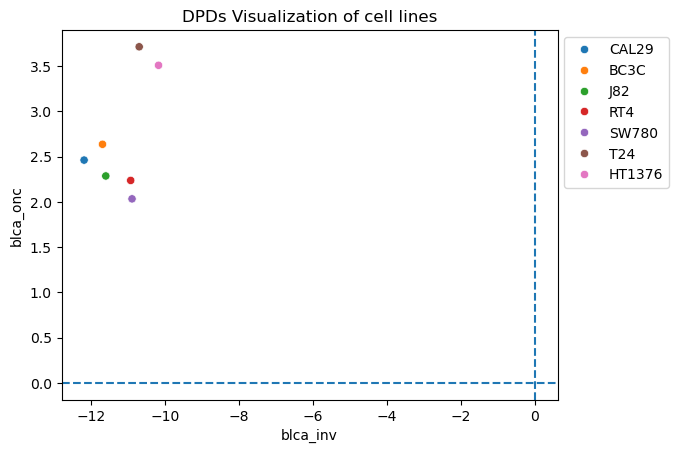

In [54]:

sns.scatterplot(DPD_cell_lines,x='blca_inv',y='blca_onc',hue='cell_line_name')
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.title("DPDs Visualization of cell lines")
plt.legend(bbox_to_anchor=(1,0, 0,1))

#plt.xlabel('DPD_N/MIBC')
#plt.savefig("/Users/lidiayung/Downloads/DPD_sct_lincs_healthy_onc.png",dpi=300)
